In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa
import cv2
from keras import optimizers
import pandas as pd
import ntpath
import imgaug.augmenters as iaaq
import random
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from PIL import ImageFile
from keras.layers import Flatten, Conv2D, MaxPooling2D # new!

from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU, PReLU


Using TensorFlow backend.


In [2]:
    def n_model():
                model = Sequential()
                model.add((Conv2D(12,(5,5), subsample=(2, 2),input_shape=(66,200,3))))  
                model.add((Conv2D(24, (5,5), subsample=(2, 2), activation='relu')))
                
                model.add((Conv2D(36, (5,5), subsample=(2, 2),activation='relu')))
                 
                model.add((Conv2D(48, (3,3), activation='relu')))
                model.add(Conv2D(60, (3, 3), activation='relu'))
                model.add(Conv2D(72, (1, 1), activation='relu'))
                model.add(Flatten())
                model.add(Dense(300, activation = 'relu'))
                model.add(Dense(200, activation = 'relu'))   
                model.add(Dense(100, activation = 'relu'))   
                model.add(Dense(10, activation = 'relu'))
                model.add(Dense(1))
                adam = Adam(lr=1e-3)
                model.compile(loss='mean_squared_error',
                    optimizer=adam,
                     metrics=['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error', 'cosine_proximity','accuracy'])

                return model
             

In [3]:
model = n_model()
print(model.summary())

C:\Users\suyas\.conda\envs\drivec\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (5, 5), input_shape=(66, 200, ..., strides=(2, 2))`
  This is separate from the ipykernel package so we can avoid doing imports until


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 31, 98, 12)        912       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 47, 24)        7224      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 22, 36)         21636     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 20, 48)         15600     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 18, 60)         25980     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 1, 18, 72)         4392      
_________________________________________________________________
flatten_1 (Flatten)          (None, 1296)             

C:\Users\suyas\.conda\envs\drivec\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), activation="relu", strides=(2, 2))`
  after removing the cwd from sys.path.
C:\Users\suyas\.conda\envs\drivec\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), activation="relu", strides=(2, 2))`
  


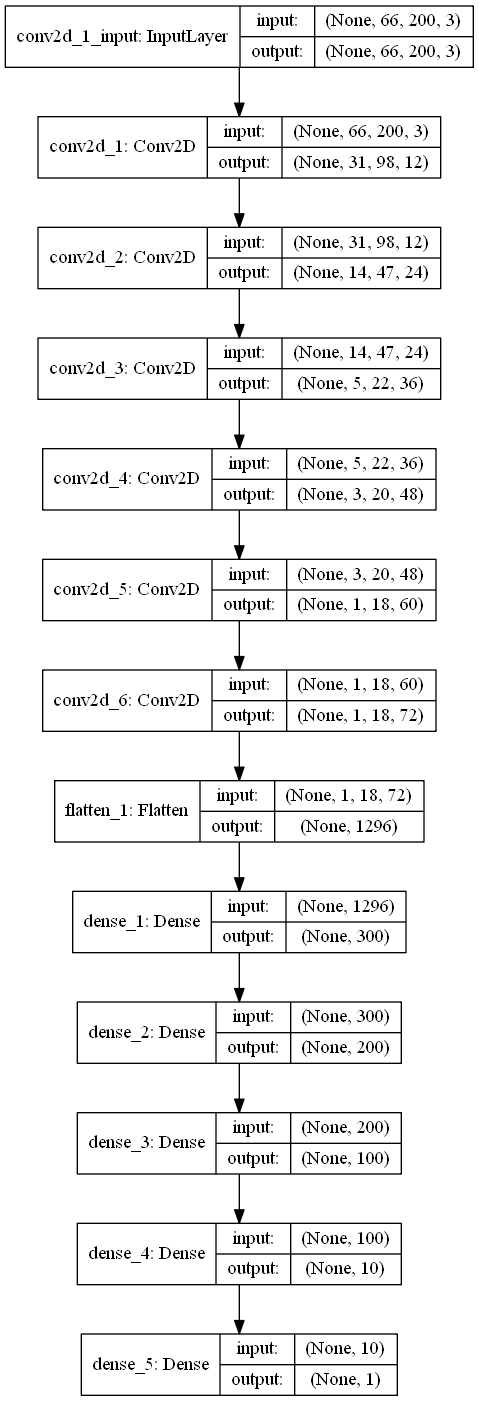

In [4]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot22.png', show_shapes=True, show_layer_names=True)